In [1]:
# import statements
import pandas as pd
from pandas import DataFrame
from numpy import NaN
import csv
from matplotlib import pyplot as plt
import os

In [2]:
# read the assay files and load the data into a data frame
def load_df(filename):
    f = open(filename)
    data_raw = f.read()
    f.close()

    data1 = data_raw.split('\n')
    data2 = data1[1:]
    header = data1[0]
    indices = header.split('\t')
    data3 = [i.split('\t') for i in data2]
    data = DataFrame(data3, columns = indices)
    data = data.replace('', NaN)
    data = data.replace('None', NaN)
    data = data.dropna()
    df = data.iloc[:100] # trim to consider about 24 hrs
    for col in df: # type conversions for all columns
        if col == 'Time' or col == 'T 500':
            continue
        df[col] = df[col].astype(float)
    return df    

In [3]:
# works for 384 (16x24) welled plate
def graph_df(df):
    fig, ax = plt.subplots(nrows = 16, ncols = 24, sharex = True, sharey = True, figsize = (20, 20))
    for col in df.columns[2:]: # exclude the non-well columns
        index = list(df.columns[2:]).index(col)
        ax[index//24][index%24].plot(df['Time'], df[col])
        ax[index//24][index%24].get_xaxis().set_visible(False)
        ax[index//24][index%24].get_yaxis().set_visible(False)

In [4]:
# inspect 4 wells
def inspect_well(df, w1, w2, w3, w4):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (4,4))
    ax[0,0].plot(df['Time'], df[w1])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,1].plot(df['Time'], df[w2])
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].get_yaxis().set_visible(False)
    ax[1,0].plot(df['Time'], df[w3])
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].get_yaxis().set_visible(False)
    ax[1,1].plot(df['Time'], df[w4])
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].get_yaxis().set_visible(False)

In [5]:
files = [item for item in os.listdir() if item.endswith('.txt')]
files

['Notes 2023 10 03.txt',
 'Rutuja 04 06.txt',
 'Rutuja 04 08.txt',
 'Rutuja 04 09.txt',
 'Rutuja 04 10.txt',
 'Rutuja 04 28.txt',
 'Rutuja 04 30.txt',
 'Rutuja 05 03.txt',
 'Rutuja 05 05.txt']

In [7]:
df5 = load_df(files[5])
df6 = load_df(files[6])
df7 = load_df(files[7])
df8 = load_df(files[8])

C:\Users\rmgup\AppData\Local\Temp\ipykernel_18184\3480844917.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\rmgup\AppData\Local\Temp\ipykernel_18184\3480844917.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\rmgup\AppData\Local\Temp\ipykernel_18184\3480844917.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

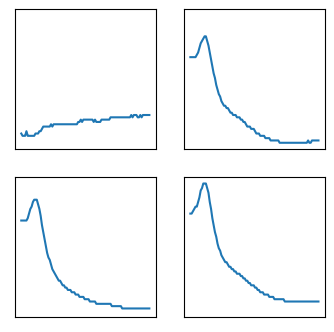

In [11]:
inspect_well(df5, 'A1', 'G2', 'M2', 'B4')

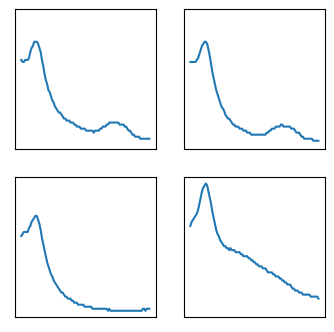

In [12]:
inspect_well(df5, 'H12', 'H13', 'B16', 'B22')

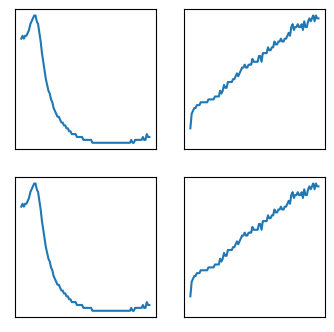

In [15]:
inspect_well(df5, 'D23', 'P24', 'D23', 'P24')

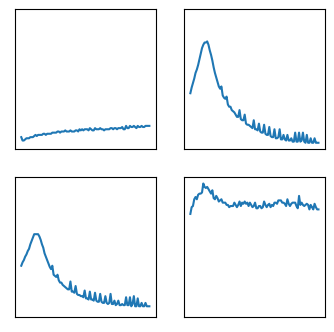

In [16]:
inspect_well(df6, 'A22', 'B22', 'B23', 'G24')

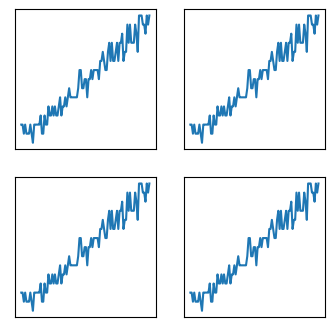

In [17]:
inspect_well(df8, 'P24', 'P24', 'P24', 'P24')

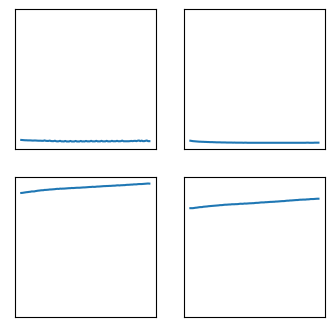

In [19]:
inspect_well(df7, 'D23', 'A18', 'G13', 'C1')

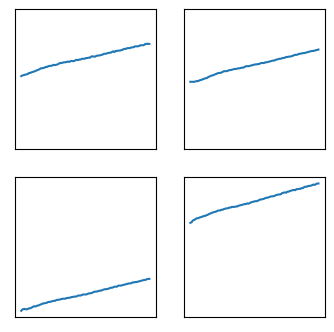

In [20]:
inspect_well(df7, 'I1', 'L2', 'P6', 'P18')

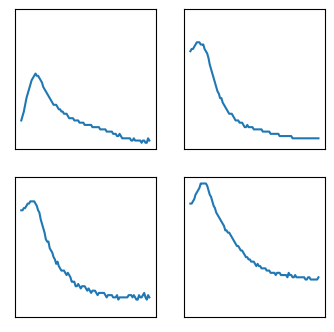

In [21]:
inspect_well(df8, 'D23', 'P13', 'J23', 'O14')

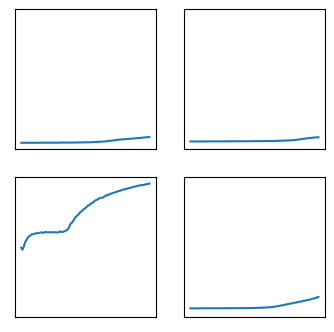

In [22]:
inspect_well(df8, 'M4', 'H15', 'I12', 'M19')

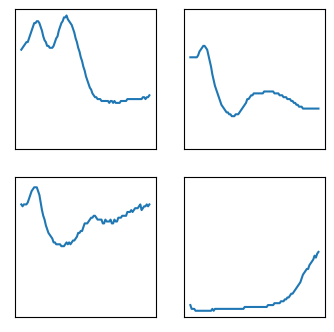

In [23]:
inspect_well(df5, 'G24', 'A12', 'P13', 'K17')

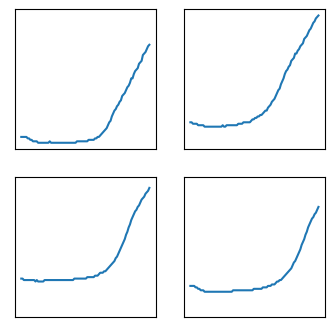

In [27]:
inspect_well(df5, 'B19', 'B18', 'D6', 'D11')

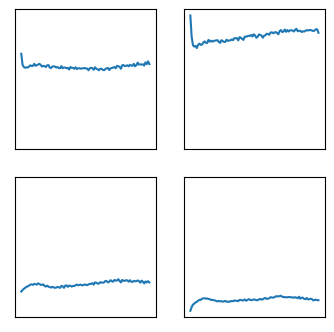

In [28]:
inspect_well(df6, 'B4', 'A6', 'B10', 'P7')

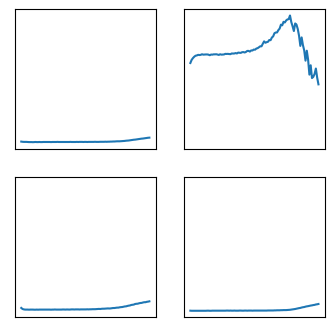

In [29]:
inspect_well(df6, 'N14', 'B12', 'I16', 'H5')

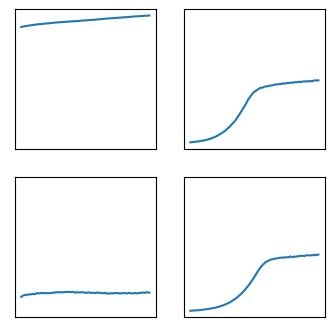

In [32]:
inspect_well(df7, 'M12', 'G6', 'M22', 'J10')

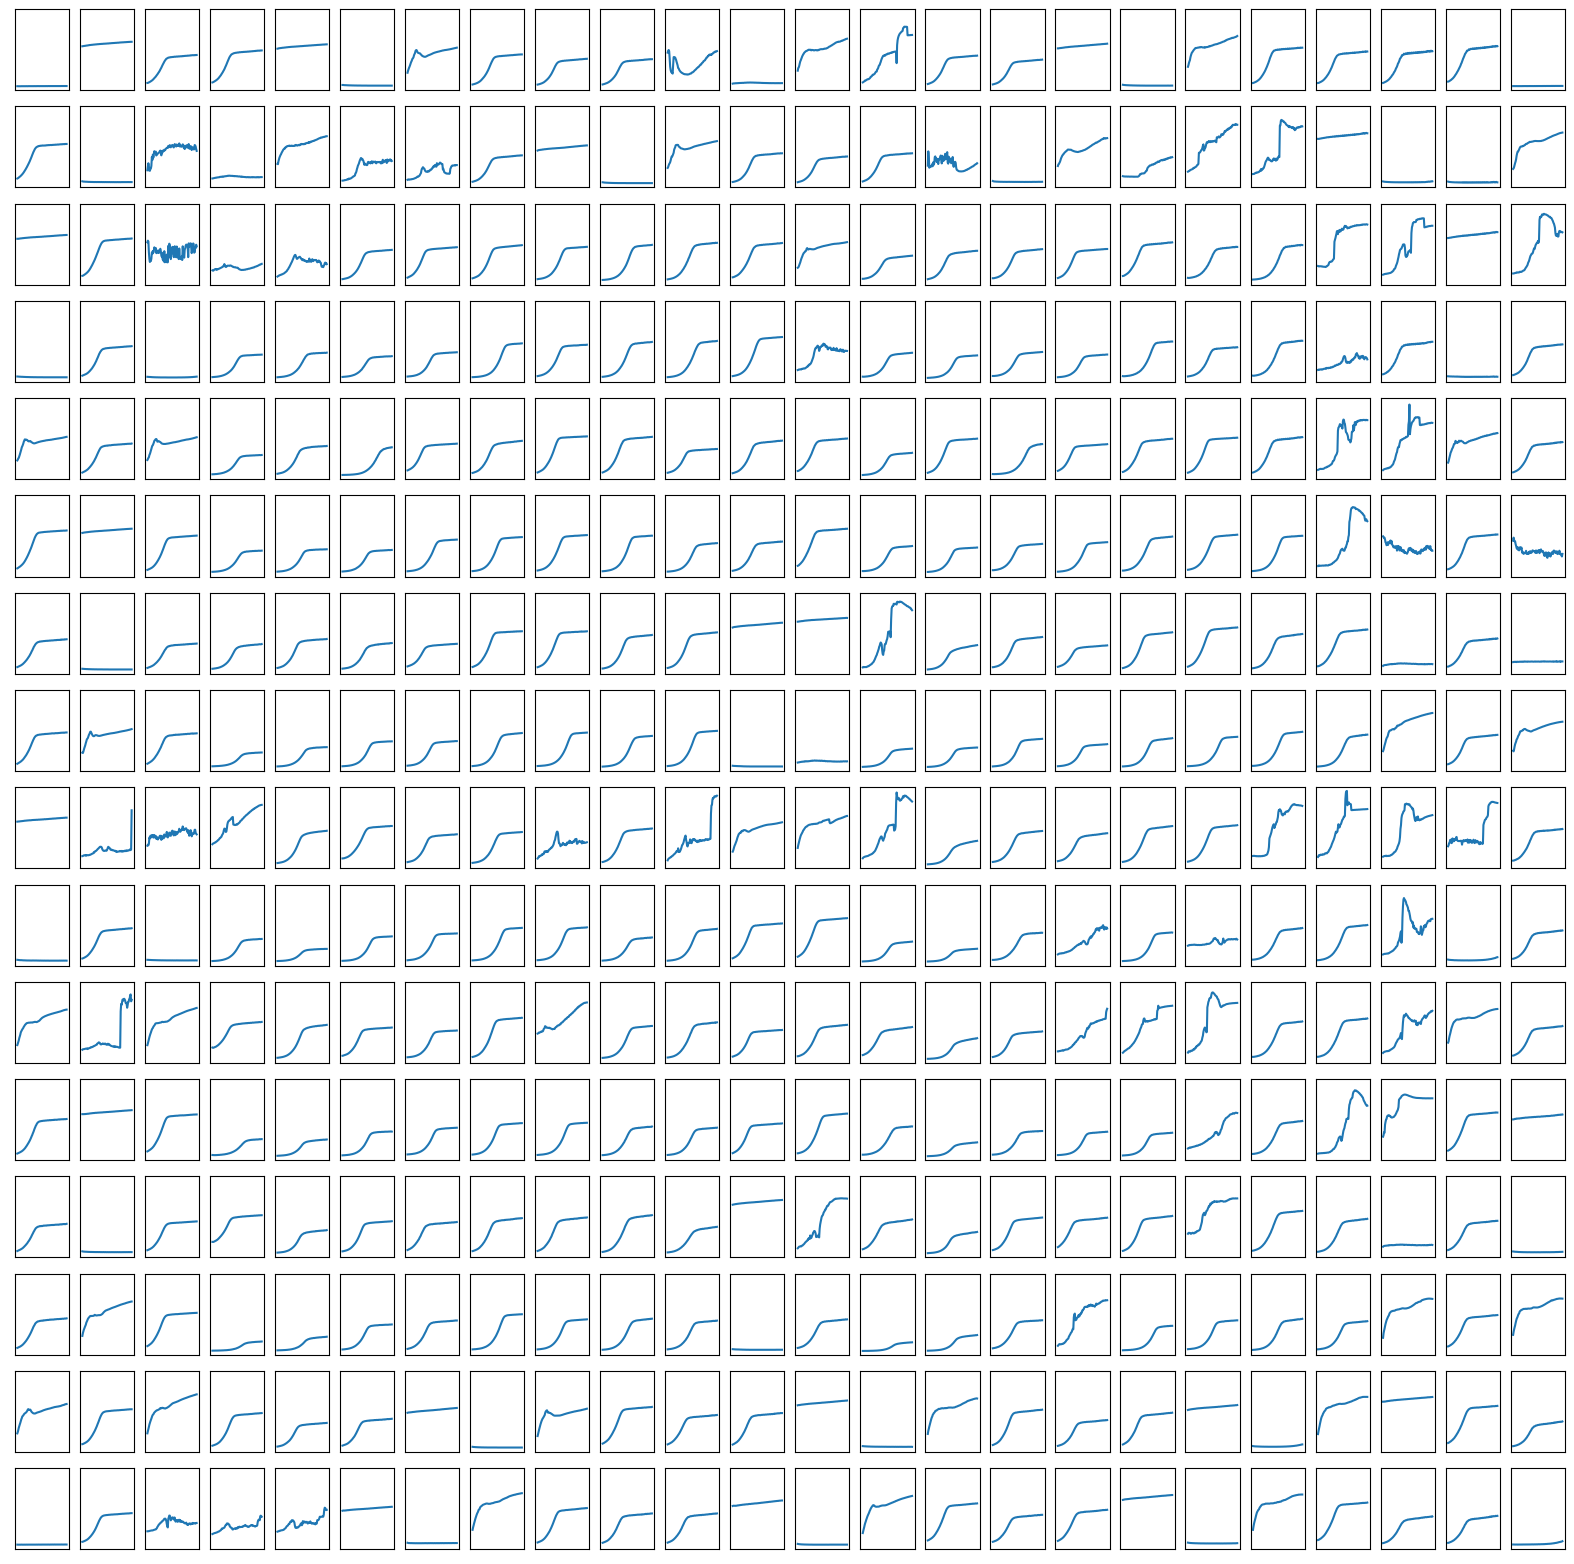

In [34]:
graph_df(df7)